In [1]:
!pip install -r requirements.txt

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt 
import cv2 as cv

# Introduction

In this notebook I will use Yolo V5 to do object detection on the images of the dataset. This will likely be different to the average notebook as I will be cloning the github of YoloV5 to use it and therefore working with the filesystem of Kaggle. 

I hope this serves as an introduction on how to use this powerful tool for image segmentation that is YoloV5

In [3]:
os.chdir('D:\\DataScience\\OPGInsightAI')

# Look at Some Images

C:\Users\arulp\AppData\Local\Temp\ipykernel_29700\3642480171.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


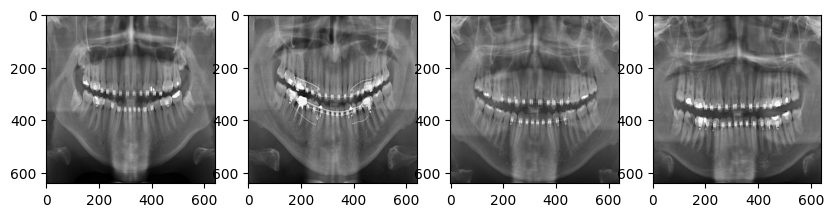

In [4]:
fig,ax = plt.subplots(1,4,figsize=(10,5))
image = cv.imread("./datasets/train/images/cate1-00001_jpg.rf.2f2135497bd579d2966b0cb84165ba91.jpg")
ax[0].imshow(image)
image = cv.imread("./datasets/train/images/cate1-00010_jpg.rf.63506f6a50819aed09b55af19649671b.jpg")
ax[1].imshow(image)
image = cv.imread("./datasets/train/images/cate1-00036_jpg.rf.3aa8cb8a60f5ace7de831d1148401214.jpg")
ax[2].imshow(image)
image = cv.imread("./datasets/train/images/cate1-00073_jpg.rf.415e3ce5ef6490c4d1e1f001048734b4.jpg")
ax[3].imshow(image)
fig.show()

# Create the File System

In [5]:
print(os.getcwd())

D:\DataScience\OPGInsightAI


In [6]:
os.mkdir(r'.\\tmp')
%cd tmp

D:\DataScience\OPGInsightAI\tmp


D:\DataScience\OPGInsightAI\opgAI\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Download YoloV5

In [7]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
# Install dependencies
%pip install -qr requirements.txt 

%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

D:\DataScience\OPGInsightAI\tmp\yolov5


Cloning into 'yolov5'...


Note: you may need to restart the kernel to use updated packages.
D:\DataScience\OPGInsightAI\tmp
Setup complete. Using torch 2.3.0+cpu (CPU)


# New YAML file

Create new Yaml file to fit the file system. 

In [8]:
print(os.getcwd())

D:\DataScience\OPGInsightAI\tmp


In [9]:
# Create .yaml file 
import yaml

data_yaml = dict(
    train = '../../datasets/train',
    val = '../../datasets/valid',
    nc = 10,
    names = ['Am', 'Co', 'Cr', 'De', 'Im', 'Ov', 'Re', 'Ro', 'pe', 'po']
    #names = ['AmalgamRestoration', 'CompositeResinRestoration', 'Crown', 'DentalCaries', 'ImpactedTooth', 'Overhang', 'RetainedRoots', 'RootCanalTreatment', 'periapicalLesion', 'post']
)

# Note that I am creating the file in the yolov5/data/ directory.
with open('./yolov5/data/data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [10]:
%cd yolov5

D:\DataScience\OPGInsightAI\tmp\yolov5


D:\DataScience\OPGInsightAI\opgAI\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Train the Yolov5 Model

In [ ]:
!wandb disabled
!python train.py --img 416 --batch 16 --epochs 50 --data ./data/data.yaml --weights yolov5n.pt

W&B disabled.


# Model Validation Output

Let's look at how the model performed on a validation batch

In [ ]:
img = cv.imread("./runs/train/exp/val_batch0_pred.jpg")
plt.figure(figsize=(50, 50))
plt.imshow(img)

# Test the model

This will test the model we have created against an image it has not seen previously.

In [ ]:
print(os.getcwd())

In [ ]:
!python detect.py --source ../../datasets/test/images/cate1-00047_jpg.rf.9502fe732690c6d2a19c6fbde83654b4.jpg --weights ./runs/train/exp/weights/best.pt

In [ ]:
img = cv.imread("./runs/detect/exp/cate1-00047_jpg.rf.9502fe732690c6d2a19c6fbde83654b4.jpg")
plt.figure(figsize=(30, 30))
plt.imshow(img)

In [ ]:
#cate1-00032_jpg.rf.c62725cfa68f4848c5bf1e2ca435d9b9.jpg
!python detect.py --source ../../datasets/test/images/cate1-00032_jpg.rf.c62725cfa68f4848c5bf1e2ca435d9b9.jpg --weights ./runs/train/exp/weights/best.pt

In [ ]:
img = cv.imread("./runs/detect/exp2/cate1-00032_jpg.rf.c62725cfa68f4848c5bf1e2ca435d9b9.jpg")
plt.figure(figsize=(30, 30))
plt.imshow(img)

# Conclusion

This shows YoloV5 being effective with this dataset. I am keen to see what you can do with the dataset :).